## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
#請嘗試將 BN 放在 Activation 之前，並比較訓練結果
from keras.layers import BatchNormalization
def build_mlp_BA(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
#請於 BN 放在 Input Layer 後，並比較結果
from keras.layers import BatchNormalization
def build_mlp_FL(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    input_layer = BatchNormalization()(input_layer)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 294s 6ms/step - loss: 2.2337 - accuracy: 0.1712 - val_loss: 20.1686 - val_accuracy: 0.2113
Epoch 46/50
50000/50000 [==============================] - 280s 6ms/step - loss: 2.2301 - accuracy: 0.1751 - val_loss: 38.4775 - val_accuracy: 0.2352
Epoch 47/50
50000/50000 [==============================] - 280s 6ms/step - loss: 2.2281 - accuracy: 0.1734 - val_loss: 53.2868 - val_accuracy: 0.2196
Epoch 48/50
50000/50000 [==============================] - 280s 6ms/step - loss: 2.2291 - accuracy: 0.1700 - val_loss: 78.6967 - val_accuracy: 0.2132
Epoch 49/50
50000/50000 [==============================] - 280s 6ms/step - loss: 2.2248 - accuracy: 0.1736 - val_loss: 42.5847 - val_accuracy: 0.2254
Epoch 50/50
50000/50000 [==============================] - 271s 5ms/step - loss: 2.2265 - accuracy: 0.1705 - val_loss: 18.5164 - val_accuracy: 0.2158


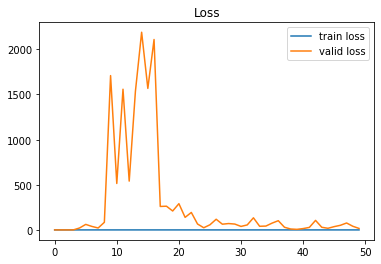

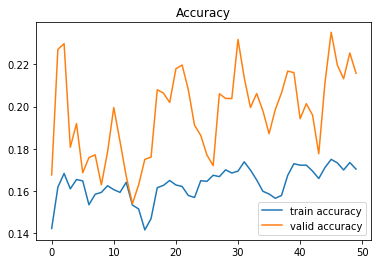

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512 

Epoch 46/50
50000/50000 [==============================] - 35s 702us/step - loss: 1.1373 - accuracy: 0.5961 - val_loss: 1.3617 - val_accuracy: 0.5268
Epoch 47/50
50000/50000 [==============================] - 34s 688us/step - loss: 1.1176 - accuracy: 0.6040 - val_loss: 1.3951 - val_accuracy: 0.5100
Epoch 48/50
50000/50000 [==============================] - 35s 703us/step - loss: 1.1211 - accuracy: 0.6025 - val_loss: 1.4027 - val_accuracy: 0.5153
Epoch 49/50
50000/50000 [==============================] - 35s 702us/step - loss: 1.1138 - accuracy: 0.6048 - val_loss: 1.3674 - val_accuracy: 0.5281
Epoch 50/50
50000/50000 [==============================] - 35s 697us/step - loss: 1.1094 - accuracy: 0.6057 - val_loss: 1.3836 - val_accuracy: 0.5162


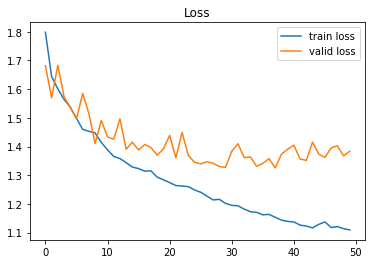

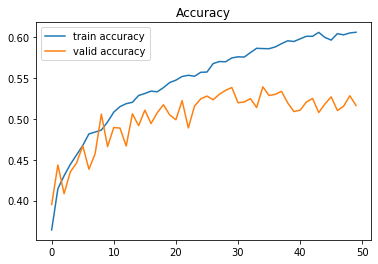

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512 

50000/50000 [==============================] - 20s 392us/step - loss: 0.8366 - accuracy: 0.7001 - val_loss: 1.5501 - val_accuracy: 0.5045
Epoch 46/50
50000/50000 [==============================] - 20s 395us/step - loss: 0.8361 - accuracy: 0.7017 - val_loss: 1.5111 - val_accuracy: 0.5232
Epoch 47/50
50000/50000 [==============================] - 21s 425us/step - loss: 0.8238 - accuracy: 0.7044 - val_loss: 1.5501 - val_accuracy: 0.5076
Epoch 48/50
50000/50000 [==============================] - 21s 423us/step - loss: 0.8098 - accuracy: 0.7080 - val_loss: 1.5817 - val_accuracy: 0.5008
Epoch 49/50
50000/50000 [==============================] - 21s 421us/step - loss: 0.8001 - accuracy: 0.7144 - val_loss: 1.5595 - val_accuracy: 0.5203
Epoch 50/50
50000/50000 [==============================] - 21s 423us/step - loss: 0.8001 - accuracy: 0.7117 - val_loss: 1.5067 - val_accuracy: 0.5257


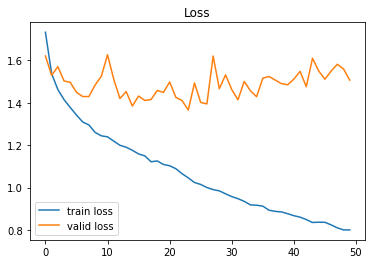

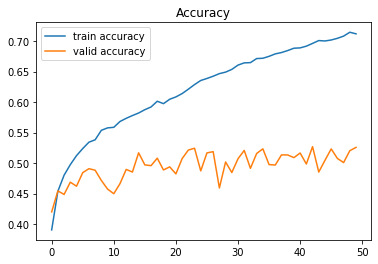

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512 

50000/50000 [==============================] - 7s 136us/step - loss: 0.3108 - accuracy: 0.8930 - val_loss: 2.5768 - val_accuracy: 0.4480
Epoch 47/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.2991 - accuracy: 0.8980 - val_loss: 2.4834 - val_accuracy: 0.4583
Epoch 48/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.2821 - accuracy: 0.9042 - val_loss: 2.4977 - val_accuracy: 0.4708
Epoch 49/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.2822 - accuracy: 0.9032 - val_loss: 2.5150 - val_accuracy: 0.4489
Epoch 50/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.2982 - accuracy: 0.8960 - val_loss: 2.3818 - val_accuracy: 0.4729


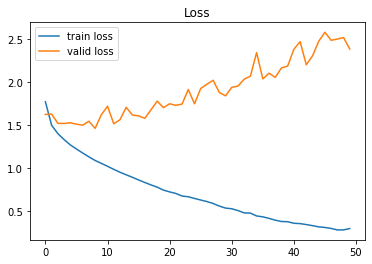

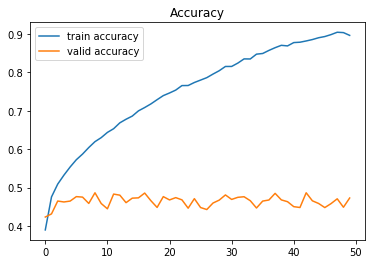

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512 

50000/50000 [==============================] - 5s 93us/step - loss: 0.2113 - accuracy: 0.9404 - val_loss: 2.3035 - val_accuracy: 0.4758
Epoch 47/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.2080 - accuracy: 0.9408 - val_loss: 2.4622 - val_accuracy: 0.4830
Epoch 48/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.1937 - accuracy: 0.9461 - val_loss: 2.2715 - val_accuracy: 0.4868
Epoch 49/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.1866 - accuracy: 0.9478 - val_loss: 2.3887 - val_accuracy: 0.4781
Epoch 50/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.1814 - accuracy: 0.9489 - val_loss: 2.5124 - val_accuracy: 0.4690


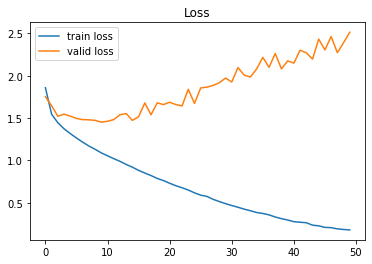

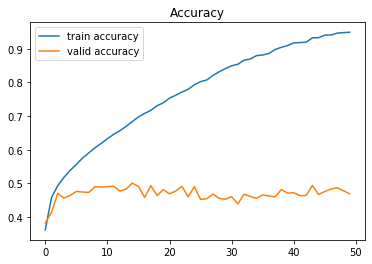

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batchSize in BATCH_SIZE :
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batchSize, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()